In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NEW_Table_2B_cid_drug_no_effect.csv')
length=len(df)

In [3]:
df

,Unnamed: 0,CID,drugname,no_of_side_effect,side_effect_name
0,0,CID100002524,"1,25(OH)2D3",106,"['Abdominal cramps', 'Abdominal pain', 'Abdomi..."
1,1,CID100006238,17-hydroxyprogesterone,48,"['Abortion spontaneous', 'Asthenia', 'Body tem..."
2,2,CID100315411,18F-FDG,7,"['Dermatitis', 'Hyperglycaemia', 'Hypersensiti..."
3,3,CID110107393,18F-flutemetamol,9,"['Blood pressure increased', 'Chest discomfort..."
4,4,CID104474778,2-hydroxysuccinaldehyde,53,"['Acute coronary syndrome', 'Anaemia', 'Arthra..."
...,...,...,...,...,...
1342,1342,CID100005731,zolmitriptan,260,"['Abdominal pain', 'Abnormal dreams', 'Abortio..."
1343,1343,CID100005732,zolpidem,327,"['Abdominal discomfort', 'Abdominal pain', 'Ab..."
1344,1344,CID100005734,zonisamide,272,"['Abdominal pain', 'Abnormal dreams', 'Acciden..."
1345,1345,CID100005735,zopiclone,259,"['Abdominal pain', 'Abnormal behaviour', 'Abno..."


In [4]:
drugname=df["drugname"]
side_eff=df["side_effect_name"]
no_side=df["no_of_side_effect"]

for j in tqdm(range(length)):
    
    list1 = set(side_eff[j].split(","))
    drugocc={}
    sideeff1=no_side[j]

    for i in range(length):
        list2 = set(side_eff[i].split(","))
        key=drugname[i]
        count=0
        
        sideeff2=no_side[i]
        
        if sideeff2<sideeff1:
            total_symp=sideeff1
        elif sideeff2>sideeff1:
            total_symp=sideeff1
        else:
            total_symp=sideeff1

        if drugname[i]==drugname[j]:
            value=1
        else:
            value = len(set(list1).intersection(list2))#total_symp
            value = value/total_symp

        drugocc[key]=value
    df[drugname[j]] = df['drugname'].map(drugocc)

100%|██████████████████████████████████████████████████████████████████████████████| 1347/1347 [01:29<00:00, 14.97it/s]


In [5]:
df["no_of_side_effect"][1]

48

In [6]:
df

,Unnamed: 0,CID,drugname,no_of_side_effect,side_effect_name,"1,25(OH)2D3",17-hydroxyprogesterone,18F-FDG,18F-flutemetamol,2-hydroxysuccinaldehyde,...,zidovudine/lamivudine,zileuton,zinc,ziprasidone,zoledronic,zolmitriptan,zolpidem,zonisamide,zopiclone,zuclopenthixol
0,0,CID100002524,"1,25(OH)2D3",106,"['Abdominal cramps', 'Abdominal pain', 'Abdomi...",1.000000,0.291667,0.285714,0.222222,0.339623,...,0.213740,0.384615,0.4,0.125964,0.200000,0.180769,0.152905,0.180147,0.181467,0.204188
1,1,CID100006238,17-hydroxyprogesterone,48,"['Abortion spontaneous', 'Asthenia', 'Body tem...",0.132075,1.000000,0.285714,0.666667,0.264151,...,0.106870,0.250000,0.2,0.056555,0.093617,0.073077,0.076453,0.069853,0.073359,0.109948
2,2,CID100315411,18F-FDG,7,"['Dermatitis', 'Hyperglycaemia', 'Hypersensiti...",0.018868,0.041667,1.000000,0.111111,0.075472,...,0.015267,0.038462,0.0,0.007712,0.017021,0.015385,0.015291,0.014706,0.007722,0.020942
3,3,CID110107393,18F-flutemetamol,9,"['Blood pressure increased', 'Chest discomfort...",0.018868,0.125000,0.142857,1.000000,0.056604,...,0.022901,0.057692,0.0,0.010283,0.021277,0.023077,0.018349,0.014706,0.015444,0.020942
4,4,CID104474778,2-hydroxysuccinaldehyde,53,"['Acute coronary syndrome', 'Anaemia', 'Arthra...",0.169811,0.291667,0.571429,0.333333,1.000000,...,0.175573,0.307692,0.2,0.071979,0.136170,0.107692,0.094801,0.102941,0.088803,0.109948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,1342,CID100005731,zolmitriptan,260,"['Abdominal pain', 'Abnormal dreams', 'Abortio...",0.443396,0.395833,0.571429,0.666667,0.528302,...,0.557252,0.692308,0.2,0.354756,0.417021,1.000000,0.452599,0.477941,0.525097,0.455497
1343,1343,CID100005732,zolpidem,327,"['Abdominal discomfort', 'Abdominal pain', 'Ab...",0.471698,0.520833,0.714286,0.666667,0.584906,...,0.580153,0.730769,0.2,0.385604,0.463830,0.569231,1.000000,0.481618,0.583012,0.560209
1344,1344,CID100005734,zonisamide,272,"['Abdominal pain', 'Abnormal dreams', 'Acciden...",0.462264,0.395833,0.571429,0.444444,0.528302,...,0.618321,0.615385,0.2,0.416452,0.417021,0.500000,0.400612,1.000000,0.548263,0.497382
1345,1345,CID100005735,zopiclone,259,"['Abdominal pain', 'Abnormal behaviour', 'Abno...",0.443396,0.395833,0.285714,0.444444,0.433962,...,0.549618,0.653846,0.2,0.344473,0.336170,0.523077,0.461774,0.522059,1.000000,0.429319


In [7]:
df.to_csv('NEW_Table_3_DrugScoreMatrix.csv')

In [8]:
data = df.iloc[5:250,5:250]
data

,"1,25(OH)2D3",17-hydroxyprogesterone,18F-FDG,18F-flutemetamol,2-hydroxysuccinaldehyde,4-AP,4-PBA,4-methylpyrazole,5-ASA,5-FU,...,atracurium,atropine,auranofin,avanafil,axitinib,azathioprine,azelaic,azelastine,azilsartan,azithromycin
5,0.141509,0.291667,0.285714,0.555556,0.169811,1.000000,0.192982,0.211538,0.093434,0.142012,...,0.405405,0.105769,0.14,0.230088,0.132231,0.152381,0.142857,0.152,0.266667,0.123762
6,0.122642,0.166667,0.142857,0.222222,0.207547,0.255814,1.000000,0.211538,0.098485,0.106509,...,0.135135,0.086538,0.30,0.159292,0.190083,0.161905,0.107143,0.088,0.155556,0.128713
7,0.150943,0.166667,0.142857,0.333333,0.169811,0.255814,0.192982,1.000000,0.060606,0.124260,...,0.189189,0.120192,0.24,0.141593,0.099174,0.095238,0.142857,0.168,0.111111,0.133663
8,0.509434,0.437500,0.571429,0.444444,0.547170,0.860465,0.684211,0.461538,1.000000,0.437870,...,0.459459,0.322115,0.80,0.628319,0.578512,0.533333,0.428571,0.560,0.488889,0.613861
9,0.292453,0.395833,0.571429,0.444444,0.452830,0.558140,0.315789,0.403846,0.186869,1.000000,...,0.351351,0.274038,0.44,0.256637,0.239669,0.276190,0.500000,0.312,0.177778,0.301980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.283019,0.395833,0.428571,0.666667,0.377358,0.465116,0.210526,0.326923,0.164141,0.218935,...,0.324324,0.168269,0.38,0.194690,0.223140,0.238095,0.250000,0.272,0.244444,0.252475
246,0.396226,0.437500,0.571429,0.555556,0.452830,0.697674,0.508772,0.576923,0.262626,0.372781,...,0.486486,0.379808,0.42,0.451327,0.388430,0.295238,0.285714,0.424,0.377778,0.351485
247,0.216981,0.312500,0.142857,0.333333,0.320755,0.558140,0.263158,0.346154,0.212121,0.218935,...,0.216216,0.115385,0.38,0.327434,0.264463,0.304762,0.142857,0.272,0.333333,0.297030
248,0.047170,0.062500,0.000000,0.000000,0.037736,0.046512,0.035088,0.057692,0.015152,0.017751,...,0.000000,0.019231,0.06,0.026549,0.024793,0.047619,0.000000,0.024,0.044444,0.014851


<AxesSubplot:>

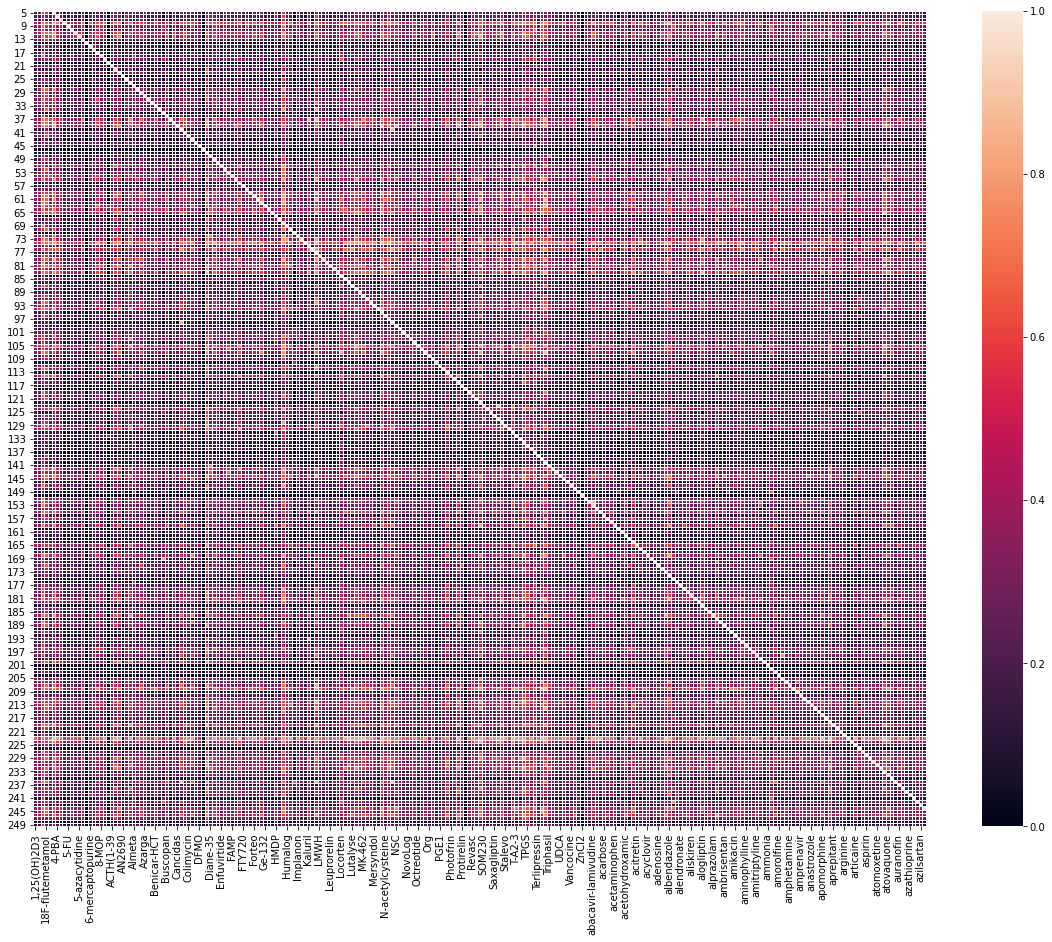

In [10]:
# plotting the heatmap
plt.subplots(figsize=(20,15))
sn.heatmap(data = data, linewidths=.5)
#plt.subplots(figsize=(20,15))
# displaying the plotted heatmap
#plt.show()